
## Thinkful Capstone Analytic Report and Research Proposal
**by: Dena Montague**

### Description of Dataset

NATO responded to the 9/11 attacks by implementing its collective defense mandate, in addition to leading a UN mandated International Security Assistance Force in Afghanistan from 2003 to 2014.  29 countries make up NATO.  The US, UK, France and Germany are the most important founding members of NATO. As such, they have been influential in shaping NATO’s presence in Afghanistan.  

These countries came together for collective defense as outlined by NATO’s mission, but what has been each country’s role in collective humanitarianism?  The estimated number of displaced Afghans is 3, 700,000.   
**This project asks, what has been the role of the UK, US, France and Germany in receiving refugees from Afghanistan?**

**To answer this question I analyzed the number of refugees who have residence or asylum in each country.**

This UN Data set from the United National High Commissioner for Refugees (UNHCR) provides data on the location of refugees around the world along with the country of origin of the refugees and the year the data was calculated.  The purpose of the data is to provide information and understand global trends to allow for thoughtful public debate and decision-making considering these vulnerable populations.  The data covers the time period of 1975 to 2016

According to the data Refugees fall into two categories -
**1)‘Refugees’ defined as:
 “Persons recognized as refugees under the 1951 UN Convention/1967 Protocol, the 1969 OAU Convention, in accordance with the UNHCR Statue, persons granted a complementary form of protection and those granted temporary protection."** 

2) Refugees and people in refugee-like situations:
“…includes groups of persons who are outside their country or territory of origin and who face protection risks similar to those of refugees, but for whom refugee status has, for practical or other reasons, not been ascertained.  

**I analyzed the data using definition #1. I selected the time period 2006-2016 because it begins a few years into the war and ends two years after the end of NATO engagement.  This time period captures the height of NATO engagement and illustrates the continued role of NATO countries after the end of their mandate.**



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
df = pd.read_csv('~/UNdata_refugees.csv')
print(df)

      Country or territory of asylum or residence  \
0                                     Afghanistan   
1                                     Afghanistan   
2                                     Afghanistan   
3                                         Albania   
4                                         Albania   
5                                         Albania   
6                                         Albania   
7                                         Albania   
8                                         Albania   
9                                         Albania   
10                                        Albania   
11                                        Albania   
12                                        Albania   
13                                        Albania   
14                                        Albania   
15                                        Albania   
16                                        Albania   
17                                        Alba

In [3]:
df.columns = ['Country_of_residence', 'Country_of_origin', 'Year', 'Refugees','Refugees_assisted', 'Refugee_like','Refugee_like assisted']

In [4]:
df.head(3)

,Country_of_residence,Country_of_origin,Year,Refugees,Refugees_assisted,Refugee_like,Refugee_like assisted
0,Afghanistan,Iraq,2016.0,1.0,1.0,1.0,1.0
1,Afghanistan,Islamic Rep. of Iran,2016.0,33.0,33.0,33.0,33.0
2,Afghanistan,Pakistan,2016.0,59737.0,59737.0,59737.0,59737.0


In [5]:
df.replace('United States', 'US', inplace=True)

In [6]:
df.replace('United Kingdom', 'UK', inplace=True)

In [7]:
Countries = df[(df['Year'] >= 2006) & df['Country_of_residence'].isin(['France','US','Germany','UK'])]

In [8]:
Countries.groupby('Country_of_residence').Refugees.mean()

Country_of_residence
France     1870.267460
Germany    3022.306257
UK         1471.646205
US         1784.765594
Name: Refugees, dtype: float64

In [12]:
Countries.groupby('Country_of_residence').Refugees.sum()

Country_of_residence
France     2356537.0
Germany    5506642.0
UK         2229544.0
US         3548114.0
Name: Refugees, dtype: float64

In [13]:
Countries.groupby('Year').Refugees.sum()

Year
2006.0    1896444.0
2007.0    1311602.0
2008.0    1325587.0
2009.0    1334985.0
2010.0    1297675.0
2011.0    1240164.0
2012.0    1219424.0
2013.0     809771.0
2014.0     853693.0
2015.0     985510.0
2016.0    1365982.0
Name: Refugees, dtype: float64

In [14]:
Countries.groupby('Year').Refugees.describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2006.0,573.0,3309.675393,12886.206244,1.0,15.0,134.0,1238.0,175579.0
2007.0,581.0,2257.490534,10044.698452,1.0,14.0,127.0,1061.0,169616.0
2008.0,581.0,2281.561102,9942.337343,1.0,13.0,128.0,1012.0,161919.0
2009.0,572.0,2333.889860,9117.450578,1.0,12.0,145.5,1018.0,123700.0
2010.0,563.0,2304.928952,8924.766464,1.0,12.0,150.0,974.0,122340.0
2011.0,601.0,2063.500832,7984.337540,1.0,12.0,120.0,858.0,110455.0
2012.0,613.0,1989.272431,7858.865776,1.0,12.0,119.0,844.0,113809.0
2013.0,603.0,1342.903814,4776.967185,1.0,11.0,78.0,603.0,65558.0
2014.0,628.0,1359.383758,5208.232704,1.0,9.0,66.0,529.0,71902.0


In [15]:
Countries.groupby('Country_of_residence').Refugees.describe()

,count,mean,std,min,25%,50%,75%,max
Country_of_residence,,,,,,,,
France,1260.0,1870.267460,5470.705266,1.0,29.75,210.5,1277.25,77661.0
Germany,1822.0,3022.306257,15147.421627,1.0,11.00,95.5,607.00,375122.0
UK,1515.0,1471.646205,6473.279780,1.0,4.00,31.0,422.00,106780.0
US,1988.0,1784.765594,6614.087777,1.0,16.00,132.0,1098.50,114615.0


In [16]:
Countries.groupby(['Country_of_residence','Year']).Refugees.sum()

Country_of_residence  Year  
France                2006.0    145996.0
                      2007.0    151789.0
                      2008.0    171206.0
                      2009.0    196364.0
                      2010.0    200687.0
                      2011.0    210207.0
                      2012.0    217865.0
                      2013.0    232487.0
                      2014.0    252264.0
                      2015.0    273126.0
                      2016.0    304546.0
Germany               2006.0    605402.0
                      2007.0    578879.0
                      2008.0    582735.0
                      2009.0    593799.0
                      2010.0    594269.0
                      2011.0    571684.0
                      2012.0    589737.0
                      2013.0    187567.0
                      2014.0    216973.0
                      2015.0    316115.0
                      2016.0    669482.0
UK                    2006.0    301556.0
                      2007.0

In [17]:
Countries['Refugees'].mean()

2071.501442672741

### Question 1: What is the relative role of the US against these NATO countries together?

### Answer: 
I took the mean of each country’s number of refugees over the specified time period. **On average, Germany accepted the most refugees, followed by France, the US and the UK.** The US took in slighly more refugees on average than the US.  But, looking at the sum of refugees between 2006-2016, Germany has accepted over 5 million refugees, followed by the US with approx. 3.5 million, France with 2.3 million and the UK with 2.2 million.

**For the purposes of this project, I define NATO as France, Germany, UK and the US. The mean of refugees accepted by the US (1784) falls  below the mean of the NATO average (2071).**   The NATO average is particularly high because of the role of Germany.


### Question 2: What is the spread of refugee acceptance? 

/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


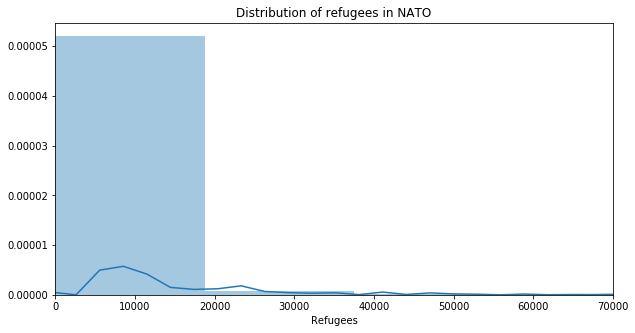

In [78]:
plt.figure(figsize=(10,5))

sns.distplot(Countries['Refugees'], bins = 20)
plt.xlim(0,70000)
plt.title('Distribution of refugees in NATO')
plt.show()

### Answer:
The histogram above shows quite a spread between the level of refugees accepted.  **Most countries in NATO accept less than 10,000 per year.**  

### Question 3: Which country accepts the most refugees?  

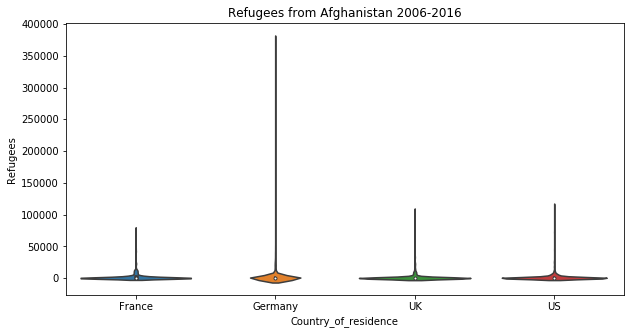

In [68]:
plt.figure(figsize=(10,5))

sns.violinplot(x='Country_of_residence', y='Refugees', data=Countries)
plt.title('Refugees from Afghanistan 2006-2016')
plt.show()

###Answer: 
This first chart “Refugees from Afghanistan 2006-2016 shows the number of refugees from Afghanistan who are residents or asylum seekers in France, Germany, UK and the US. **The numbers of refugees in Germany is far higher than France, UK and the US.** 



In [49]:
df1 = df[(df['Country_of_residence']=='France')&(df['Year']>=2006)]
France_accept = pd.DataFrame(df1)

In [50]:
df4 = df[(df['Country_of_residence']=='UK')&(df['Year']>=2006)]
UK_accept = pd.DataFrame(df4)

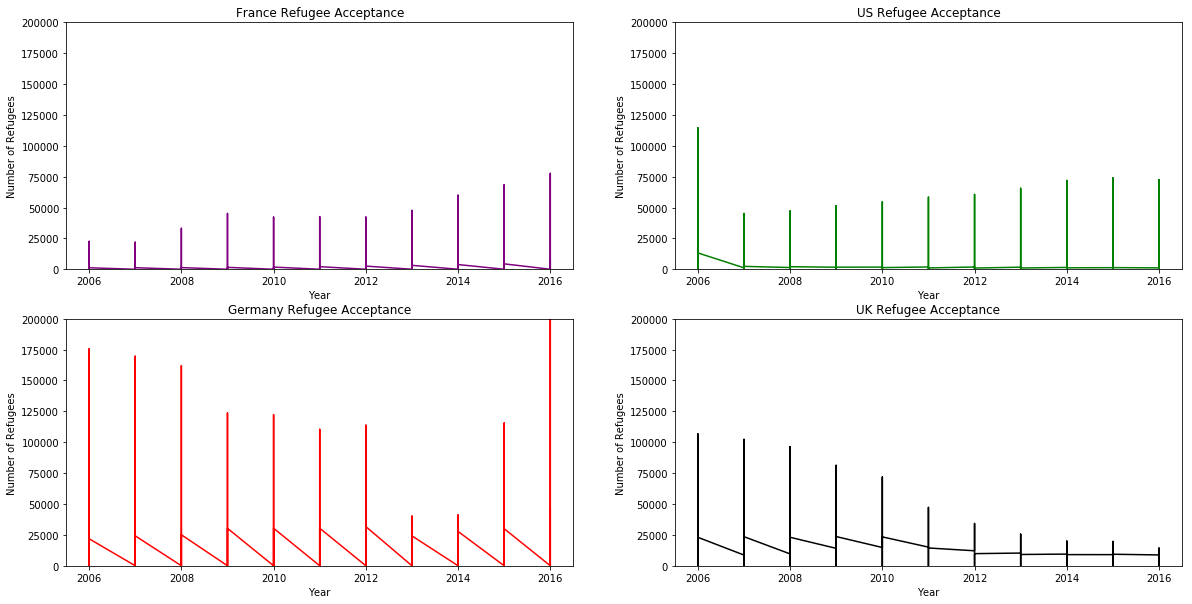

In [63]:
plt.figure(figsize=(20,10))

plt.subplot(2, 2, 1)
plt.plot(France_accept['Year'], France_accept['Refugees'], color='purple')
plt.ylim(0, 200000)
plt.ylabel('Number of Refugees')
plt.xlabel('Year')
plt.title('France Refugee Acceptance')

plt.subplot(2, 2, 2)
plt.plot(US_accept['Year'], US_accept['Refugees'], color='green')
plt.ylim(0, 200000)
plt.ylabel('Number of Refugees')
plt.xlabel('Year')
plt.title('US Refugee Acceptance')

plt.subplot(2, 2, 3)
plt.plot(Germany_accept['Year'], Germany_accept['Refugees'], color='red')
plt.ylim(0, 200000)
plt.ylabel('Number of Refugees')
plt.xlabel('Year')
plt.title('Germany Refugee Acceptance')

plt.subplot(2, 2, 4)
plt.plot(UK_accept['Year'], UK_accept['Refugees'], color='black')
plt.ylim(0, 200000)
plt.ylabel('Number of Refugees')
plt.xlabel('Year')
plt.title('UK Refugee Acceptance')

plt.show()

### Answer:

The sub-plots above show a breakdown of refugee acceptance by country.  **As of 2016, the number of refugees in the UK is the lowest level among all the NATO countries analyzed in this study.** The UK has seen a substantial decline in the number of refugees received.  The reduction in the number of refugees received seems to have occurred around 2010 and leveled out around 2012, hovering between 9-10,000 refugees per year. France is the most consistent in terms of accepting refugees. Whereas the other countries have accepted over 10,000 refugees in a year, **France has never accepted more than 7685 refugees, which occurred in 2016. The US accepted the most refugees in 2006. Since 2006 the US has consistently received less than 80,000 refugees per year. Germany received the most refugees in 2016.**

Text(0.5,1,'Refugee Acceptance')

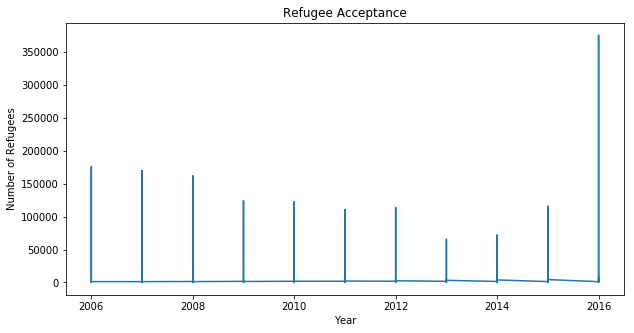

In [47]:
plt.figure(figsize=(10,5))

plt.plot(Countries['Year'] , Countries['Refugees'])
plt.ylabel('Number of Refugees')
plt.xlabel('Year')
plt.title('Refugee Acceptance')

The chart above show the acceptance level by year.  ***The greatest number of refugees accepted occured in 2016.***

### Question 4: What it the difference between US acceptance levels and overall NATO acceptance levels?

In [69]:
df2 = df[(df['Country_of_residence']=='US')&(df['Year']>=2006)]
US_accept = pd.DataFrame(df2)

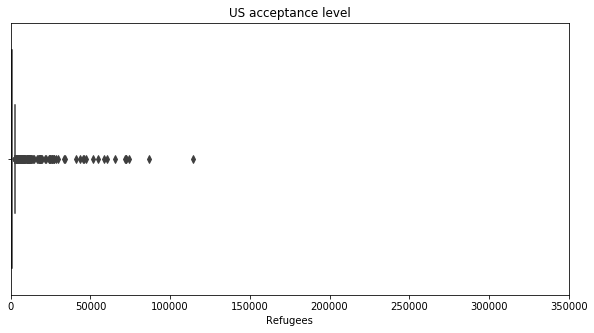

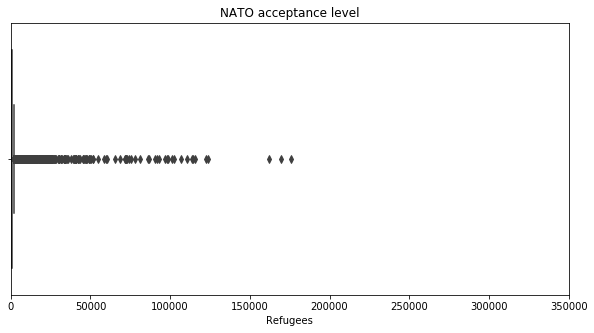

In [28]:
plt.figure(figsize=(10,5))


sns.boxplot(x = US_accept['Refugees'], data=df2)
plt.xlim(0,350000)
plt.title('US acceptance level')
plt.show()

plt.figure(figsize=(10,5))

sns.boxplot(x = Countries['Refugees'], data=df)
plt.xlim(0,350000)
plt.title('NATO acceptance level')
plt.show()

### Answer:
 The two boxplots above show the difference between US acceptance level and the overall accpetance level in NATO.  From these boxplot we see that **the US accepts a significantly lower level of refugees than NATO as a whole.**  

In [70]:
df3 = df[(df['Country_of_residence']=='Germany')&(df['Year']>=2006)]
Germany_accept = pd.DataFrame(df3)

**These final charts visualize the substantial difference between the number of refugees accepted by Germany and the U.S.**

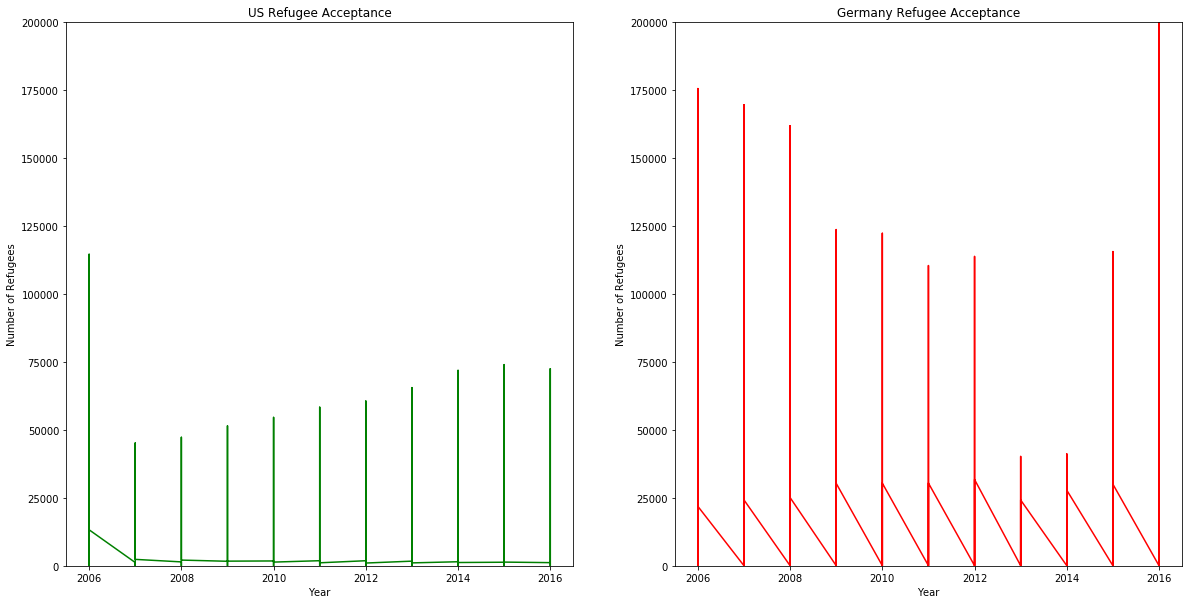

In [71]:
plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
plt.plot(US_accept['Year'], US_accept['Refugees'], color='green')
plt.ylim(0, 200000)
plt.ylabel('Number of Refugees')
plt.xlabel('Year')
plt.title('US Refugee Acceptance')

plt.subplot(1, 2, 2)
plt.plot(Germany_accept['Year'], Germany_accept['Refugees'], color='red')
plt.ylim(0, 200000)
plt.ylabel('Number of Refugees')
plt.xlabel('Year')
plt.title('Germany Refugee Acceptance')


plt.show()

In [67]:
print(ttest_ind(US_accept['Refugees'], Germany_accept['Refugees'], equal_var = False))

Ttest_indResult(statistic=-3.217539687313694, pvalue=0.0013098519987184117)


**The t-test shows that the means of US acceptance rate and the acceptance rate of Germany are reliably different from one another.**  The p-value is less than .05

**Further research**

Considering the war in Afghanistan was started in response to the 9/11 attacks, by analyzing this data several questions emerge.  Primarily, why on average does the U.S. accept fewer refugees from Afghanistan than its NATO allies? Are there particular political considerations that influence the number of refugees accepted?  During this time period, why did Germany increase the number of refuges while the UK and US have reduced the number of refugees and France has shown a slight increase?  Answering these questions requires qualitative analyses of NATO mandates, individual country analysis of political environment etc. as well as quantitative analyses over a longer period of time with a larger N size.  
